In [48]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm
import seaborn as sns
%matplotlib inline

In [49]:
ticker = 'SPY'
data = pd.DataFrame()
yf.pdr_override()
data[ticker] = wb.DataReader(ticker, start='1993-2-1')['Adj Close']
data.head()

[*********************100%***********************]  1 of 1 completed


SPY
Date                 
1993-02-01  25.397581
1993-02-02  25.451405
1993-02-03  25.720438
1993-02-04  25.828064
1993-02-05  25.810116

In [50]:
log_returns = np.log(1+data.pct_change())
log_returns.head()

SPY
Date                
1993-02-01       NaN
1993-02-02  0.002117
1993-02-03  0.010515
1993-02-04  0.004176
1993-02-05 -0.000695

C:\Users\mcken\AppData\Local\Temp\ipykernel_12112\2122475142.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_returns.iloc[1:])


Text(0, 0.5, 'Frequency')

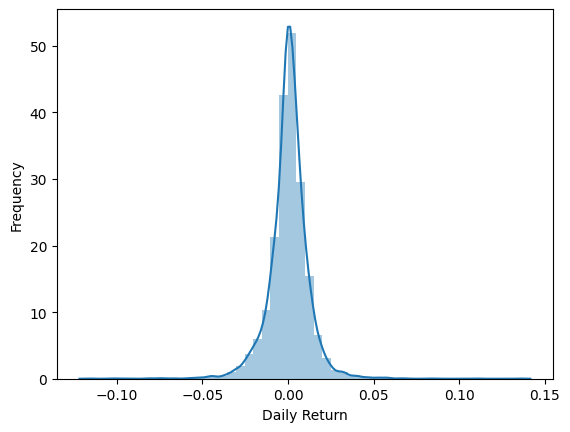

In [51]:
sns.distplot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

<Axes: xlabel='Date'>

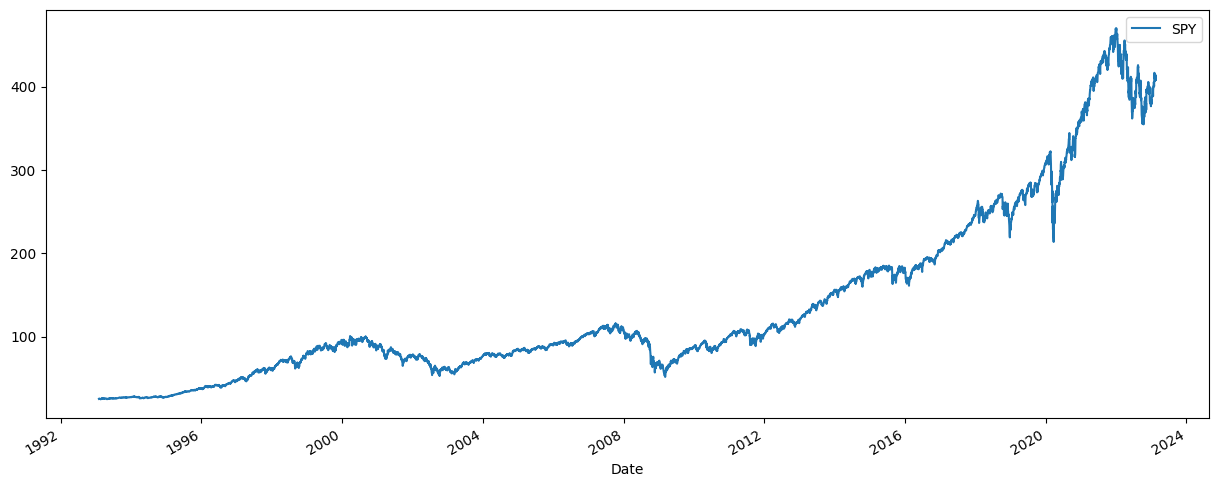

In [52]:
data.plot(figsize=(15,6))

<Axes: xlabel='Date'>

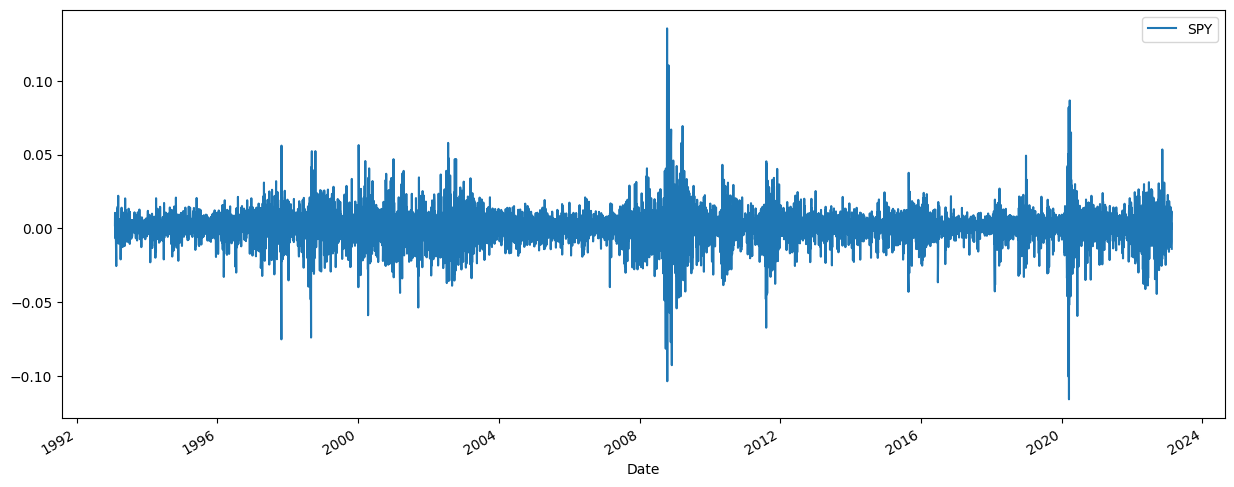

In [53]:
log_returns.plot(figsize=(15,6))

In [54]:
u = log_returns.mean()
var = log_returns.var()

$$
{drift} = {u} - \frac{1}{2} * {var}
$$

In [55]:
drift = u - (0.5*var)
drift

SPY    0.000296
dtype: float64

In [56]:
stddev = log_returns.std()

In [57]:
x = np.random.rand(10,2)
x

array([[0.97078006, 0.6363    ],
       [0.174992  , 0.25804306],
       [0.20326884, 0.96095719],
       [0.089183  , 0.26451399],
       [0.2418212 , 0.94186182],
       [0.27678007, 0.21857491],
       [0.07610513, 0.03613255],
       [0.3359782 , 0.69090545],
       [0.90124212, 0.41338601],
       [0.15716964, 0.1421144 ]])

In [58]:
norm.ppf(x)

array([[ 1.89238374,  0.34858619],
       [-0.93462032, -0.64939033],
       [-0.83000195,  1.76190338],
       [-1.34580318, -0.6294905 ],
       [-0.70045627,  1.57059666],
       [-0.59243379, -0.77701517],
       [-1.43176788, -1.79744441],
       [-0.42346448,  0.4984185 ],
       [ 1.28866162, -0.21884342],
       [-1.00615861, -1.07086797]])

In [59]:
Z = norm.ppf(np.random.rand(1000,10000))
Z

array([[ 1.27520374, -0.03136841, -0.89594458, ..., -0.63667347,
        -0.55674448, -0.2527378 ],
       [-1.36971922,  0.47404334, -0.43706425, ..., -1.51389754,
        -0.97701639, -0.21029606],
       [ 0.35281884, -1.40547672,  0.71000937, ..., -0.19124058,
         1.90896346, -0.02823017],
       ...,
       [ 1.52219669,  1.23489468, -0.17215053, ...,  1.45874762,
         1.85402116,  1.65127464],
       [ 0.68460979, -0.53896007, -1.88964591, ...,  1.21742512,
         0.42107478,  0.67033558],
       [ 0.35613833, -0.20191315,  0.05708176, ...,  1.04735516,
        -1.03521706,  0.25364395]])

In [60]:
t_intervals = 1000
iterations = 10000

$$
{daily}_{returns} = {e^r}
$$

$$
{r}={drift}+{stdev*z}
$$

In [61]:
daily_returns = np.exp(drift.values + stddev.values * norm.ppf(np.random.rand(1000,10000)))

In [62]:
daily_returns

array([[0.99473278, 0.99847461, 1.00187631, ..., 0.98489006, 1.00893134,
        0.99135098],
       [1.00695723, 0.97771484, 0.99088786, ..., 0.99531303, 0.999236  ,
        1.0179263 ],
       [0.99825209, 0.99881106, 0.99191512, ..., 0.98696036, 1.04422532,
        1.00690647],
       ...,
       [0.99686851, 1.0131136 , 0.98372397, ..., 0.98429166, 1.00329912,
        0.99457582],
       [0.99337302, 0.99860154, 1.0067021 , ..., 0.98884218, 1.00498053,
        0.99041471],
       [1.00074954, 1.01686536, 0.99107928, ..., 0.99163521, 1.00013929,
        1.01296216]])

---

In [63]:
S0 = data.iloc[-1]
S0

SPY    408.279999
Name: 2023-02-16 00:00:00, dtype: float64

In [64]:
price_list = np.zeros_like(daily_returns)

In [65]:
price_list.shape

(1000, 10000)

In [66]:
price_list[0] = S0
price_list

array([[408.27999878, 408.27999878, 408.27999878, ..., 408.27999878,
        408.27999878, 408.27999878],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [67]:
for t in range(1,1000):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [68]:
price_list.shape

(1000, 10000)

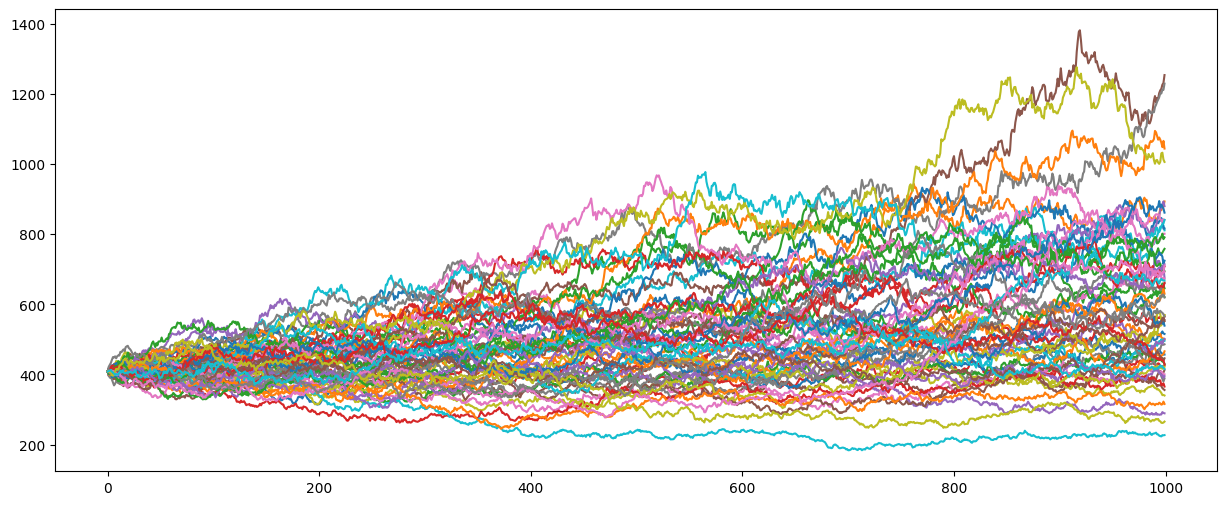

In [77]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_list).iloc[:,0:60])

In [ ]:
sns.distplot(pd.DataFrame(price_list).iloc[-1])
plt.xlabel("Price after 50 days")

In [78]:
df = pd.DataFrame(price_list)
df.describe()

0            1            2            3            4     \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    489.560246   585.147500   637.429257   408.467286   489.625010   
std      39.963620   201.816078   134.004739    20.638093    67.215901   
min     375.913839   342.866051   392.913588   361.351101   373.197974   
25%     460.998801   392.737571   507.890579   393.625882   446.474279   
50%     492.314006   560.735995   639.994845   405.887291   473.878629   
75%     516.318241   819.190933   759.221266   420.596075   517.568601   
max     583.297278   943.851148   871.751797   483.568919   739.416083   

              5            6            7            8            9     ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    375.950693   527.264748   417.025832   384.378382   613.941565  ...   
std      22.070219    74.192667    24.685203    47.046739   143.596352  ...   
min     327.056067   396.657901   354.509876   296.984403   368.948535  ...   
25%     358.094550   476.248472   399.694862   346.280965   484.363882  ...   
50%     376.645537   522.336838   415.506334   377.503467   649.017640  ...   
75%     392.531372   593.646067   436.879082   421.181668   727.039798  ...   
max     430.987287   694.164345   486.014822   492.168161   876.400935  ...   

              9990         9991         9992         9993         9994  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    561.089143   665.865692   359.674185   336.545722   429.150627   
std      63.086619   129.634846    31.673123    54.514005    37.206406   
min     404.088202   387.128907   280.839871   236.228975   326.655154   
25%     515.891631   617.638969   344.551136   285.971351   405.439609   
50%     573.067750   686.712696   364.182883   335.090811   432.021630   
75%     611.957989   758.680840   381.372108   384.337123   461.363256   
max     696.872580   884.506907   434.475780   448.868603   497.658406   

              9995         9996         9997         9998         9999  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean    455.048624   519.877205   491.434160   457.644529   707.133207  
std      54.699583    97.849798    60.602771    45.853719   113.416813  
min     369.092736   387.395621   372.424162   347.453658   408.279999  
25%     412.853965   457.607491   444.520761   425.051164   643.168125  
50%     438.724908   491.600055   481.923632   461.412618   744.692676  
75%     485.195275   537.402000   524.658876   493.734683   789.763838  
max     621.443463   778.353174   682.755560   551.691478   883.726978  

[8 rows x 10000 columns]

In [72]:
df.head()

0           1           2           3           4           5     \
0  408.279999  408.279999  408.279999  408.279999  408.279999  408.279999   
1  411.120499  399.181415  404.559696  411.716289  413.873465  395.393026   
2  410.401897  398.706811  401.288879  406.788500  418.243701  396.485136   
3  416.083674  397.266857  398.820080  414.446760  413.720576  399.154561   
4  414.285448  394.417484  395.682549  412.541357  420.694857  388.808980   

         6           7           8           9     ...        9990  \
0  408.279999  408.279999  408.279999  408.279999  ...  408.279999   
1  412.850995  403.241940  412.887670  405.597163  ...  411.465689   
2  419.384674  400.461935  416.219018  401.948083  ...  406.328987   
3  421.435176  401.757192  417.852414  391.498448  ...  404.106024   
4  416.693281  402.906823  418.250280  397.844089  ...  406.275567   

         9991        9992        9993        9994        9995        9996  \
0  408.279999  408.279999  408.279999  408.279999  408.279999  408.279999   
1  410.367980  410.951883  408.317463  411.669890  408.098184  409.775154   
2  417.572576  410.636889  415.925285  414.153273  411.573090  397.276419   
3  414.710804  413.331243  408.824813  409.774230  412.769985  400.500976   
4  407.284428  413.952647  400.789315  410.529106  415.999420  395.955998   

         9997        9998        9999  
0  408.279999  408.279999  408.279999  
1  406.366404  407.968071  415.598947  
2  401.067535  426.010590  418.469271  
3  400.676076  427.858494  412.913021  
4  401.405703  427.221005  410.086728  

[5 rows x 10000 columns]

In [73]:
import seaborn as sns

C:\Users\mcken\AppData\Local\Temp\ipykernel_12112\642212787.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\mcken\AppData\Local\Temp\ipykernel_12112\642212787.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\mcken\AppData\Local\Temp\ipykernel_12112\64221278

KeyboardInterrupt: 

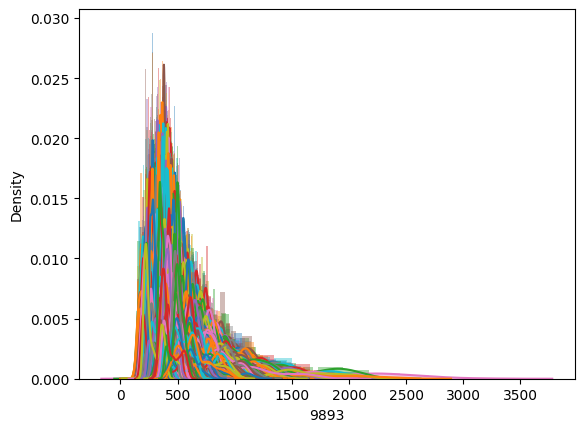

In [74]:
for i in range(len(df.columns)):
    sns.distplot(df[i])